### Data Preprocessing
We will load Iris dataset from our downloaded data dirctory and do some preprocessing to have a better understanding, though you can simply do *load_iris* from *sklearn.datasets*.

In [4]:
import pandas as pd
iris_df = pd.read_csv('data/iris/iris.data', header=None)
iris_df.columns = ['sepal length', 'sepal height', 'petal length',
                   'petal height', 'type']
iris_df.head()

,sepal length,sepal height,petal length,petal height,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data = iris_df.iloc[:,:-1].values
iris_target = iris_df.iloc[:,-1].values
print(iris_data.shape, iris_target.shape, iris_data[0], iris_target[0])

(150, 4) (150,) [5.1 3.5 1.4 0.2] Iris-setosa


In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data, iris_target, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


/Users/satohlab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Multi-Classification Via Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']


---
* **Accuracy**, **Precision**, **Recall**, **F1**
* Note that ROC-Curve and Precision-Recall-Curve are restricted to binary classification.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, \
                    recall_score, f1_score
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average='weighted')
recall = recall_score(y_pred, y_test, average='weighted')
f1 = f1_score(y_pred, y_test, average='weighted')
print('Accuracy score is {0:.2f}'.format(accuracy))
print('Precision score is {0:.2f}'.format(precision))
print('Recall score is {0:.2f}'.format(recall))
print('F1 score is {0:.2f}'.format(f1))

Accuracy score is 0.89
Precision score is 0.92
Recall score is 0.89
F1 score is 0.89


---
* Classification Report

In [32]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_test, y_pred)
print('classification report: \n {}'.format(class_rep))

classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.71      0.83        17
 Iris-virginica       0.74      1.00      0.85        14

    avg / total       0.92      0.89      0.89        45



---
* Confusion Matrix

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14  0  0]
 [ 0 12  5]
 [ 0  0 14]]


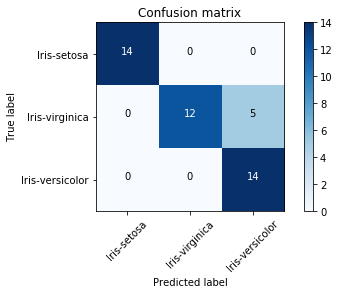

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat, set(iris_target))

### Multi-Classification Via Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
class_rep = classification_report(y_test, y_pred)
print('classification report: \n {}'.format(class_rep))

classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

    avg / total       0.98      0.98      0.98        45



### Multi-Classification Via SVM

In [75]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
class_rep = classification_report(y_test, y_pred)
print('classification report: \n {}'.format(class_rep))

classification report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        14

    avg / total       1.00      1.00      1.00        45



---
* Combine with Grid Search to tune parameters (if necessary)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
pipeline = Pipeline([('svm', SVC(kernel='rbf'))])
parameters = {
    'svm__gamma':(0.01, 0.03, 0.1, 0.3, 1),
    'svm__C':(0.1, 0.3, 1, 3, 10, 30)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=4, 
                           verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameter set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, ':', best_parameters[param_name])
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best score: 0.9809523809523809
Best parameter set:
svm__C : 10
svm__gamma : 0.1
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

    avg / total       0.98      0.98      0.98        45



[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.1s finished
